/tmp/ipykernel_4486/3243853802.py:38: RuntimeWarning: divide by zero encountered in log
  mag_spectrum = [np.log(np.abs(z)) for z in fft_shift]


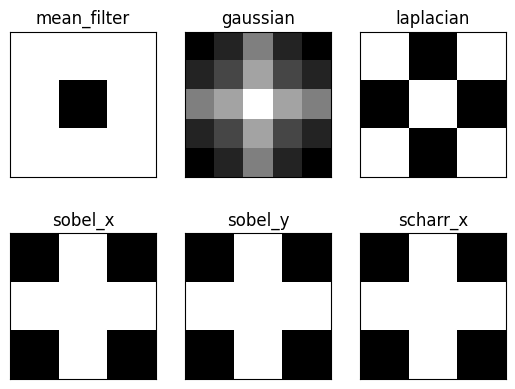

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv2
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from skimage.transform import pyramid_gaussian
import imutils


# Простой средний фильтр без параметров масштабирования
mean_filter = np.ones((3,3))
 # Создать фильтр Гаусса
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T
 # Различные фильтры обнаружения края
 # scharr в направлении x
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
 # собел в направлении x
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
 # собел в направлении y
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
 # Преобразование Лапласа
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)) for z in fft_shift]
for i in iter(range(6)):
    # Add 1 to the index i to start from 1 instead of 0
    plt.subplot(2,3,i + 1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

ValueError: num must be an integer with 1 <= num <= 6, not 7

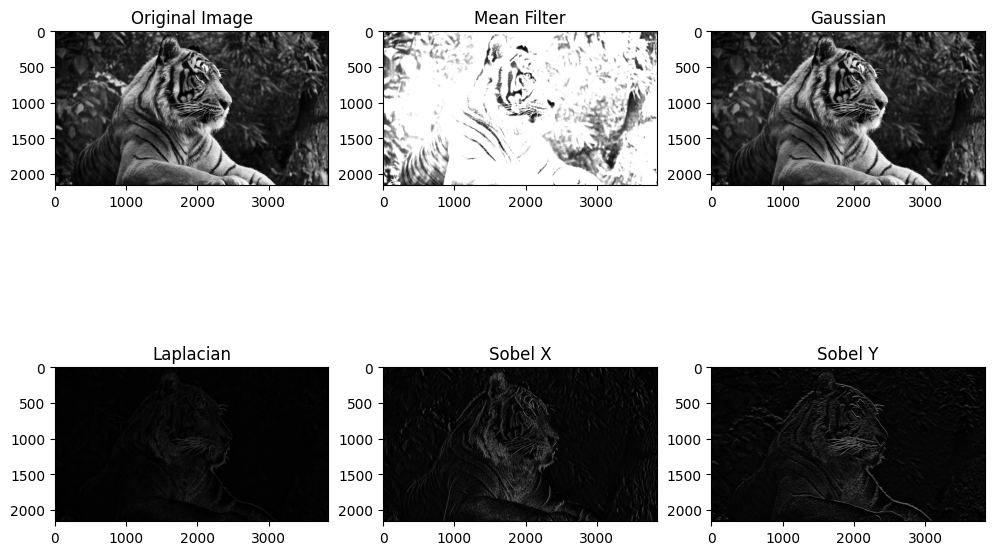

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения (замените 'your_image.jpg' на путь к вашему изображению)
image = cv2.imread('1.jpg', cv2.IMREAD_COLOR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mean_filter = np.ones((3,3))
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_y = np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
laplacian = np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['Mean Filter', 'Gaussian', 'Laplacian', 'Sobel X', 'Sobel Y', 'Scharr X']

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

for i in range(len(filters)):
    filtered_image = cv2.filter2D(gray_image, -1, filters[i])
    
    plt.subplot(2, 3, i+2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(filter_name[i])

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

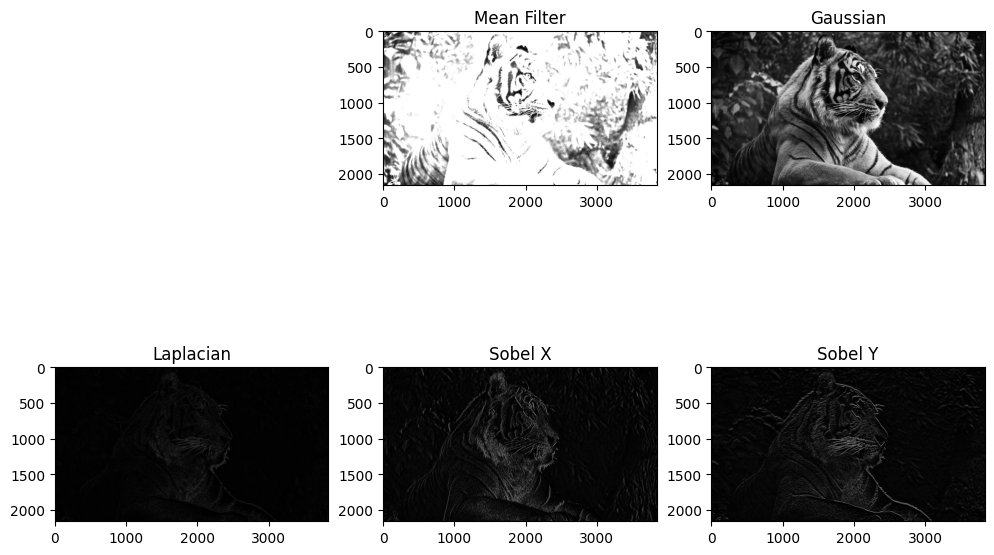

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('1.jpg', cv2.IMREAD_COLOR)

# Преобразование в оттенки серого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Определение фильтров
mean_filter = np.ones((3, 3))
x = cv2.getGaussianKernel(5, 10)
gaussian = x * x.T
scharr = np.array([[-3, 0, 3],
                   [-10, 0, 10],
                   [-3, 0, 3]])
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
laplacian = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['Mean Filter', 'Gaussian', 'Laplacian', 'Sobel X', 'Sobel Y', 'Scharr X']

plt.figure(figsize=(12, 8))

# Отображение оригинального изображения
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

# Применение фильтров и отображение
for i in range(len(filters)):
    filtered_image = cv2.filter2D(gray_image, -1, filters[i])
    
    plt.subplot(2, 3, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(filter_name[i])

plt.tight_layout()
plt.show()

In [ ]:
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_names = [
    "Mean Filter", "Gaussian Blur", "Laplacian", 
    "Sobel X", "Sobel Y", "Scharr X"
]

plt.figure(figsize=(12, 8))
for i, (kernel, name) in enumerate(zip(filters, filter_names)):
    filtered = cv2.filter2D(gray, -1, kernel)
    plt.subplot(2, 3, i + 1)
    plt.imshow(filtered, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()